In [2]:
import pandas as pd
import numpy as np

#read data
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.index = df.index + 1
pd.set_option('max_columns', 100)
df.head(10)
#schema

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
1,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 1 to 73268
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [30]:
#check duplicated
df[df.duplicated()]

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly


In [36]:
#check null
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Employment              1559
RemoteWork             14310
CodingActivities       14369
                       ...  
TrueFalse_2            37553
TrueFalse_3            37519
SurveyLength            2824
SurveyEase              2760
ConvertedCompYearly    35197
Length: 79, dtype: int64

### What is the most popular languages?

In [54]:
dff = df[df['LanguageHaveWorkedWith'].notnull()]
lst = []
for i,item in enumerate(dff['LanguageHaveWorkedWith']):
    row = item.split(';')
    lst.extend(row)
language = pd.DataFrame(lst,columns =['Language'])
data = language.value_counts().to_frame().reset_index()
data.columns = ['Language','Count']
data.sort_values(by='Count', ascending = False)

,Language,Count
0,JavaScript,46443
1,HTML/CSS,39142
2,SQL,35127
3,Python,34155
4,TypeScript,24752
5,Java,23644
6,Bash/Shell,20656
7,C#,19883
8,C++,16024
9,PHP,14827


### Which countries have developers the most?

In [62]:
dff = df[df['Country'].notnull()]
data = dff['Country'].value_counts().to_frame().reset_index()
data.columns = ['Country','Count']
data.head(10)

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
5,France,2328
6,Brazil,2109
7,Poland,1732
8,Netherlands,1555
9,Spain,1521


### what is the most popular age of developers?

In [64]:
dff = df[df['Age'].notnull()]
data = dff['Age'].value_counts().to_frame().reset_index()
data.columns = ['Age','Count']
data

,Age,Count
0,25-34 years old,28112
1,18-24 years old,16646
2,35-44 years old,13988
3,45-54 years old,5281
4,Under 18 years old,3866
5,55-64 years old,1978
6,65 years or older,554
7,Prefer not to say,521


### How much does remote working matter to employees?

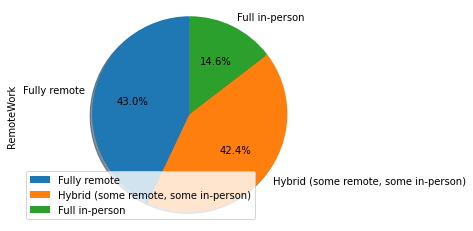

In [39]:
import matplotlib.pyplot as plt
remote_working = df['RemoteWork'].value_counts().to_frame() #
remote_working.plot(kind = 'pie', 
                    subplots=True, 
                    autopct='%1.1f%%' , #add in percentages
                    startangle=90,   #start angle = 90
                    shadow=True)
plt.axis('equal')
plt.show()

### What's the most popular method of learning to code?

In [9]:
dt = df[df['LearnCode'].notnull()] #get responded data of LearnCode
lst_lrn_mth =[] #create empty list

for i in range(0,len(dt)):
    row = dt['LearnCode'].iloc[i].split(';') #query rows and convert to lists
    lst_lrn_mth.extend(row) #add to List
    
lm = pd.DataFrame(lst_lrn_mth, columns = ['learning_method']) #convert list to column
lrn_mth = lm.value_counts().sort_values(ascending = False).to_frame().reset_index() #create data which counted and sorted
lrn_mth.columns = ['learning_method','total_person']
lrn_mth

,learning_method,total_person
0,"Other online resources (e.g., videos, blogs, f...",50756
1,"School (i.e., University, College, etc)",44506
2,Books / Physical media,38994
3,Online Courses or Certification,33379
4,On the job training,28523
5,Colleague,13188
6,Friend or family member,9987
7,Coding Bootcamp,7731
8,Hackathons (virtual or in-person),5269
9,Other (please specify):,3558


### Are you more likely to get a job as a developer if you have a master's degree?

In [45]:
#get values: notnull and 'Developer' from DevType
dm = df[['EdLevel','DevType']][df['DevType'].notnull()].reset_index().drop('index', axis = 1)
dvp = dm[dm['DevType'].str.contains('Developer')] #getting rows that contain 'Developer'
dvp.dtypes

EdLevel    object
DevType    object
dtype: object

In [46]:
#counting types of degree (get a job as a developer)
sum_deg = dvp['EdLevel'].value_counts().to_frame().reset_index() #degree group
sum_deg.columns = ['Degree_Type_tobe_Developer', 'Total'] #rename column after group degrees
sum_deg['Total'] = sum_deg['Total'].astype(float) #converting 'Total' from object to float
total_dev = len(dvp)

#function for getting percentage of types of degree to get a job as a Developer
def get_per(r):
    perc = round((r/total_dev*100),1)
    return str(perc) + '%'

#Create Percentage column
sum_deg['Percentage'] = sum_deg['Total'].apply(get_per)

sum_deg

,Degree_Type_tobe_Developer,Total,Percentage
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24851.0,47.9%
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12052.0,23.2%
2,Some college/university study without earning ...,6675.0,12.9%
3,"Secondary school (e.g. American high school, G...",3408.0,6.6%
4,"Associate degree (A.A., A.S., etc.)",1732.0,3.3%
5,"Other doctoral degree (Ph.D., Ed.D., etc.)",1096.0,2.1%
6,"Professional degree (JD, MD, etc.)",896.0,1.7%
7,Something else,680.0,1.3%
8,Primary/elementary school,484.0,0.9%


### What is the most popular job?

In [42]:
dff = df[df['DevType'].notnull()]
lst_DevType = []

for i in range(0,len(dff)):
    row = dff['DevType'].iloc[i].split(';') #query rows and convert to lists
    lst_DevType.extend(row) #add to List
    
lm = pd.DataFrame(lst_DevType, columns = ['Dev_Job']) #convert list to column
lrn_mth = lm.value_counts().sort_values(ascending = False).to_frame().reset_index() #create data which counted and sorted
lrn_mth.columns = ['Dev_Job','total_dev']
lrn_mth['total_dev'].dtypes

total_dev = lrn_mth['total_dev'].sum()
def get_per(r):
    perc = round((r/total_dev*100),1)
    return str(perc) + '%'

lrn_mth['Percentage'] = lrn_mth['total_dev'].apply(get_per)
lrn_mth

,Dev_Job,total_dev,Percentage
0,"Developer, full-stack",28701,17.4%
1,"Developer, back-end",26595,16.1%
2,"Developer, front-end",15915,9.7%
3,"Developer, desktop or enterprise applications",9546,5.8%
4,"Developer, mobile",7634,4.6%
5,DevOps specialist,6170,3.7%
6,Student,5595,3.4%
7,Cloud infrastructure engineer,5283,3.2%
8,Database administrator,4934,3.0%
9,System administrator,4908,3.0%


### -----------------------------------------------------------------